In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('/kaggle/input/alcohol-sales/Alcohol_Sales.csv', parse_dates=True, index_col='DATE')
df.index.freq='MS'

In [17]:
df.shape
df['Sales'] = df['S4248SM144NCEN']
df.head()

,S4248SM144NCEN,Sales
DATE,,
1992-01-01,3459,3459
1992-02-01,3458,3458
1992-03-01,4002,4002
1992-04-01,4564,4564
1992-05-01,4221,4221


<Axes: xlabel='DATE'>

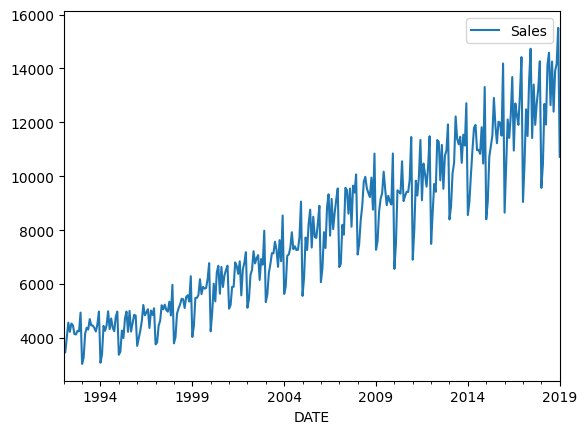

In [19]:
df['Sales'].plot(legend=True)

In [20]:
df['saleslastmonthsback']=df['Sales'].shift(+1)
df['sales2monthsback']=df['Sales'].shift(+2)
df['sales3monthsback']=df['Sales'].shift(+3)
df

,S4248SM144NCEN,Sales,saleslastmonthsback,sales2monthsback,sales3monthsback
DATE,,,,,
1992-01-01,3459,3459,NaN,NaN,NaN
1992-02-01,3458,3458,3459.0,NaN,NaN
1992-03-01,4002,4002,3458.0,3459.0,NaN
1992-04-01,4564,4564,4002.0,3458.0,3459.0
1992-05-01,4221,4221,4564.0,4002.0,3458.0
...,...,...,...,...,...
2018-09-01,12396,12396,14257.0,12640.0,14583.0
2018-10-01,13914,13914,12396.0,14257.0,12640.0
2018-11-01,14174,14174,13914.0,12396.0,14257.0


In [22]:
df=df.dropna()
df

,S4248SM144NCEN,Sales,saleslastmonthsback,sales2monthsback,sales3monthsback
DATE,,,,,
1992-04-01,4564,4564,4002.0,3458.0,3459.0
1992-05-01,4221,4221,4564.0,4002.0,3458.0
1992-06-01,4529,4529,4221.0,4564.0,4002.0
1992-07-01,4466,4466,4529.0,4221.0,4564.0
1992-08-01,4137,4137,4466.0,4529.0,4221.0
...,...,...,...,...,...
2018-09-01,12396,12396,14257.0,12640.0,14583.0
2018-10-01,13914,13914,12396.0,14257.0,12640.0
2018-11-01,14174,14174,13914.0,12396.0,14257.0


In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
lin_model=LinearRegression()
model=RandomForestRegressor(n_estimators=100,max_features=3,random_state=42)

In [26]:
import numpy as np
x1,x2,x3,y=df['saleslastmonthsback'],df['sales2monthsback'],df['sales3monthsback'],df['Sales']
x1,x2,x3,y=np.array(x1),np.array(x2),np.array(x3),np.array(y)
x1,x2,x3,y=x1.reshape(-1,1),x2.reshape(-1,1),x3.reshape(-1,1),y.reshape(-1,1)
final_x=np.concatenate((x1,x2,x3),axis=1)
print(final_x)

[[ 4002.  3458.  3459.]
 [ 4564.  4002.  3458.]
 [ 4221.  4564.  4002.]
 [ 4529.  4221.  4564.]
 [ 4466.  4529.  4221.]
 [ 4137.  4466.  4529.]
 [ 4126.  4137.  4466.]
 [ 4259.  4126.  4137.]
 [ 4240.  4259.  4126.]
 [ 4936.  4240.  4259.]
 [ 3031.  4936.  4240.]
 [ 3261.  3031.  4936.]
 [ 4160.  3261.  3031.]
 [ 4377.  4160.  3261.]
 [ 4307.  4377.  4160.]
 [ 4696.  4307.  4377.]
 [ 4458.  4696.  4307.]
 [ 4457.  4458.  4696.]
 [ 4364.  4457.  4458.]
 [ 4236.  4364.  4457.]
 [ 4500.  4236.  4364.]
 [ 4974.  4500.  4236.]
 [ 3075.  4974.  4500.]
 [ 3377.  3075.  4974.]
 [ 4443.  3377.  3075.]
 [ 4261.  4443.  3377.]
 [ 4460.  4261.  4443.]
 [ 4985.  4460.  4261.]
 [ 4324.  4985.  4460.]
 [ 4719.  4324.  4985.]
 [ 4374.  4719.  4324.]
 [ 4248.  4374.  4719.]
 [ 4784.  4248.  4374.]
 [ 4971.  4784.  4248.]
 [ 3370.  4971.  4784.]
 [ 3484.  3370.  4971.]
 [ 4269.  3484.  3370.]
 [ 3994.  4269.  3484.]
 [ 4715.  3994.  4269.]
 [ 4974.  4715.  3994.]
 [ 4223.  4974.  4715.]
 [ 5000.  4223. 

In [28]:
x_train,x_test,y_train,y_test=final_x[:-30],final_x[-30:],final_x[:-30],final_x[-30:]
model.fit(x_train,y_train)
lin_model.fit(x_train,y_train)

LinearRegression()

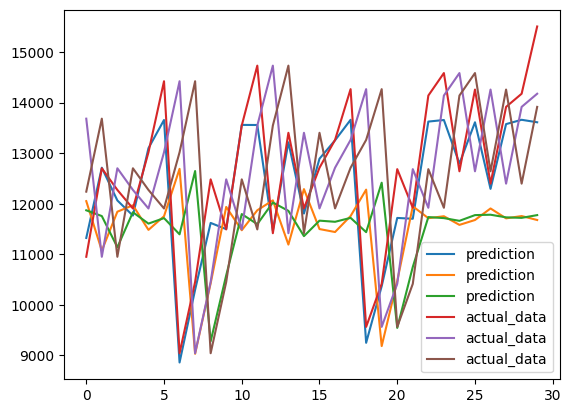

In [31]:
import matplotlib.pyplot as plt
pred1=model.predict(x_test)
plt.plot(pred1,label='prediction')
plt.plot(y_test,label='actual_data')
plt.legend()
plt.show()


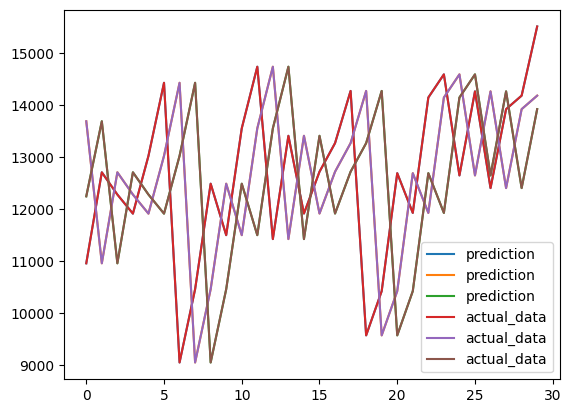

In [32]:
pred2=lin_model.predict(x_test)
plt.plot(pred2,label='prediction')
plt.plot(y_test,label='actual_data')
plt.legend()
plt.show()


In [34]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse1=sqrt(mean_squared_error(pred1,y_test))
rmse2=sqrt(mean_squared_error(pred2,y_test))
print(rmse1)
print(rmse2)

1207.1891092027702
1.7042074520523112e-12


SINCE THE RMSE OF LINEAR MODEL IS VERY LESS, HENCE IT CAN BE USED TO PREDICT THE NUMBER OF ALCOHOL SALES BETTER THAN RANDOM FOREST. 